In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
import os
import json
import numpy as np
import pickle
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import contextily as cx
import folium
from tqdm import trange, tqdm


In [4]:
from utils import *
from create_polygon import Create_random_polygon

In [167]:
cities = [
    'Ordu',
    # 'Manisa',
    # 'Trabzon',
    # 'Adana',
    # 'Cairo',
    # 'Johannesburg',
]

In [165]:
for c in cities:
    df = os.path.join("data","OSM",f"{c}_labeled.pkl")
    df = pickle.load(open(df,"rb"))
    df= df.to_crs("EPSG:3395")
    
    df["polygon_type"] = "valid"
    invalid = df[~df.is_valid].index
    
    new_p = []
    for index, r in df[~df.is_valid].iterrows():
        df.loc[index, "geometry"], polygon_type = reorder_points_90(r["geometry"])
        df.loc[index, "polygon_type"] = polygon_type
        
    df.to_pickle(os.path.join("data","OSM",f"{c}_labeled_repaired.pkl"))
    
    print(c, "OSM", len(invalid), "repaired")
    

Johannesburg OSM 25104 repaired


In [166]:
for c in cities:
    df = os.path.join("data","OSMB",f"{c}_labeled.pkl")
    df = pickle.load(open(df,"rb"))
    df= df.to_crs("EPSG:3395")
    
    df["polygon_type"] = "valid"
    invalid = df[~df.is_valid].index
    
    new_p = []
    for index, r in df[~df.is_valid].iterrows():
        df.loc[index, "geometry"], polygon_type = reorder_points_90(r["geometry"])
        df.loc[index, "polygon_type"] = polygon_type
        
    df.to_pickle(os.path.join("data","OSMB",f"{c}_labeled_repaired.pkl"))
    
    print(c, "OSMB", len(invalid), "repaired")

Johannesburg OSMB 6 repaired


---

In [170]:
c="Cairo"
df = os.path.join("data","OSM",f"{c}_labeled.pkl")
df = pickle.load(open(df,"rb"))
df= df.to_crs("EPSG:3395")

In [119]:
invalid = df[~df.is_valid].index

In [7]:
df.loc[df["id"]==233644673, "geometry"] = reorder_points_90(df.loc[df["id"]==233644673,"geometry"].iloc[0])
df[df["id"]==236879520]

,geometry,id,type,category,tags
40691,"POLYGON ((3487313.102 3464804.417, 3487377.779...",236879520,way,Commercial,{'building': 'industrial'}


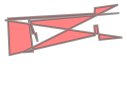

In [171]:
df.loc[df["id"]==233644673, "geometry"].iloc[0]
df.loc[df["id"]==238783292, "geometry"].iloc[0]
df.loc[df["id"]==544222307, "geometry"].iloc[0]
df.loc[df["id"]==1075808208, "geometry"].iloc[0]
df.loc[df["id"]==452839964, "geometry"].iloc[0]

In [186]:
from shapely.ops import triangulate
from shapely.geometry import MultiPoint

In [187]:
pps = MultiPoint(list(df.loc[df["id"]==452839964, "geometry"].iloc[0].exterior.coords))

In [188]:
triangles = triangulate(pps)

In [194]:
gdf = geopandas.GeoDataFrame(geometry=triangles)
gdf.set_crs("EPSG:3395")

,geometry
0,"POLYGON ((3474524.229 3484555.620, 3474529.116..."
1,"POLYGON ((3474524.229 3484555.620, 3474542.274..."
2,"POLYGON ((3474524.229 3484555.620, 3474552.148..."
3,"POLYGON ((3474527.457 3484557.424, 3474552.148..."
4,"POLYGON ((3474527.457 3484557.424, 3474548.363..."
5,"POLYGON ((3474548.040 3484559.023, 3474548.363..."
6,"POLYGON ((3474548.040 3484559.023, 3474555.732..."
7,"POLYGON ((3474548.040 3484559.023, 3474614.142..."
8,"POLYGON ((3474614.465 3484567.862, 3474614.142..."
9,"POLYGON ((3474614.465 3484567.862, 3474639.044..."


<AxesSubplot:>

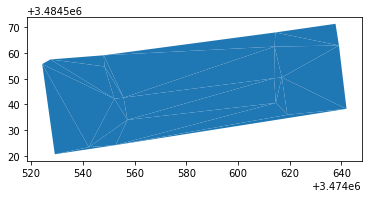

In [195]:
gdf.plot()

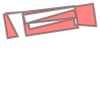

In [146]:
x, _ = reorder_points_90(df.loc[df["id"]==452839964,"geometry"].iloc[0])
x

In [140]:
points = list(df.loc[df["id"]==544222307, "geometry"].iloc[0].exterior.coords)
points = list(df.loc[df["id"]==1075808208, "geometry"].iloc[0].exterior.coords)

In [136]:
cal_angle(np.array([-1,-1]), np.array([0,1]))

135.0

In [142]:
v1 = np.array([points[0][0]-points[1][0], points[0][1]-points[1][1]])
total = 0
for index, p in enumerate(points):
    if index <1:
        continue
    v2 = np.array([points[index-1][0]-points[index][0], points[index-1][1]-points[index][1]])
    total = total + 180- cal_angle(v1, v2)
    v1=v2
print(total)
    

1504.7141122284538


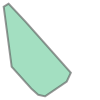

In [89]:
# reorder_points_90(df.loc[df["id"]==233644673,"geometry"].iloc[0])
# reorder_points_90(df.loc[df["id"]==238783292,"geometry"].iloc[0])
reorder_points_90(df.loc[df["id"]==544222307,"geometry"].iloc[0])

In [10]:
df= df.to_crs("EPSG:4326")
df[df["id"]==236879520]

,geometry,id,type,category,tags
40691,"POLYGON ((31.32707 29.86398, 31.32765 29.86449...",236879520,way,Commercial,{'building': 'industrial'}


In [147]:
new_p = []
for index, r in df[~df.is_valid].iterrows():
    # df.loc[index, "geometry"] = reorder_points(r["geometry"])
    # df.loc[index, "geometry"] = r["geometry"].exterior.convex_hull
    # temp = Create_random_polygon(array=list(r["geometry"].exterior.coords))
    # polygon_array = temp.main()
    # df.loc[index, "geometry"] =  Polygon(polygon_array)
    
    df.loc[index, "geometry"],_ = reorder_points_90(r["geometry"])


2it [00:00, 116.75it/s]


In [121]:
df= df.to_crs("EPSG:4326")
df.loc[invalid].explore()

In [94]:
df.loc[~df.is_valid].explore()

ValueError: Location values cannot contain NaNs.

In [30]:
df.loc[~df.is_valid]

,geometry,id,type,category,tags
31452,"POLYGON ((31.43660 30.02350, 31.43670 30.02329...",302660349,way,Accommodation,{'building': 'residential'}
33025,"POLYGON ((31.41018 30.01314, 31.41032 30.01314...",653192461,way,Accommodation,{'building': 'residential'}
33071,"POLYGON ((31.40951 30.01558, 31.40966 30.01558...",653192520,way,Accommodation,{'building': 'residential'}
